In [1]:
# script to plot the error in ignition delay for table 7 vs. number of parameters replaced

In [1]:
import os
import pandas as pd
import numpy as np
import cantera as ct

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the experimental conditions
ignition_delay_data = '/work/westgroup/harris.se/autoscience/autoscience/butane/experimental_data/butane_ignition_delay.csv'
ignition_delay_data = '/home/moon/autoscience/autoscience/butane/experimental_data/butane_ignition_delay.csv'
df_exp = pd.read_csv(ignition_delay_data)

# slice just table 7, where phi=1.0
table7 = df_exp[df_exp['Table'] == 7]
# Define Initial conditions using experimental data
tau7 = table7['time (ms)'].values.astype(float)  # ignition delay
T7 = table7['T_C'].values  # Temperatures
P7 = table7['nominal pressure(atm)'].values * ct.one_atm  # pressures in atm


# list of starting conditions
# Mixture compositions taken from table 2 of
# https://doi-org.ezproxy.neu.edu/10.1016/j.combustflame.2010.01.016
concentrations = []
# for phi = 1
x_diluent = 0.7649
conc_dict = {
    'O2(2)': 0.2038,
    'butane(1)': 0.03135
}

for i in range(0, len(table7)):
    x_N2 = table7['%N2'].values[i] / 100.0 * x_diluent
    x_Ar = table7['%Ar'].values[i] / 100.0 * x_diluent
    x_CO2 = table7['%CO2'].values[i] / 100.0 * x_diluent
    conc_dict['N2'] = x_N2
    conc_dict['Ar'] = x_Ar
    conc_dict['CO2(7)'] = x_CO2
    concentrations.append(conc_dict)


In [3]:
results_dir = '/home/moon/autoscience/autoscience/paper/error_vs_num_included/results'
results_dir = '/home/moon/autoscience/reaction_calculator/error_vs_num_included/results'


In [4]:
tau7

array([86.5 , 73.9 , 31.3 , 33.  , 30.9 , 30.  , 56.  , 56.6 , 67.9 ,
       66.4 , 65.2 , 67.1 , 47.  , 27.9 , 28.05, 12.  ])

In [5]:
def calculate_error(delays):
    return np.sum(np.float_power(delays - (tau7 / 1000), 2.0))


In [9]:
N = 51

missing_indices = []

# figure out if a new parameter was actually replaced in that version
error = np.zeros(N)
indices = np.arange(0, N)
for i in range(0, N):
    delay_file = os.path.join(results_dir, f'delays_{i}.npy')
    if not os.path.exists(delay_file):
        error[i] = error[i - 1]
        missing_indices.append(i)
        continue
    delays = np.load(delay_file)
    error[i] = calculate_error(delays)

Text(0, 0.5, 'Sum of Squared Error')

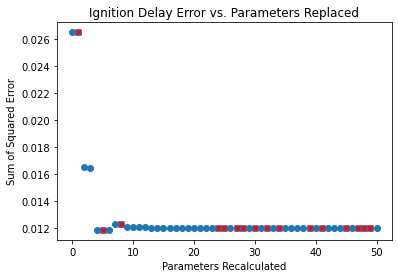

In [14]:
plt.scatter(indices, error)

incomplete = [15, 32, 36, 38, 43]
# for index in incomplete:
for index in missing_indices:
    plt.scatter(index, error[index], marker='x', color='red')
plt.title('Ignition Delay Error vs. Parameters Replaced')
plt.xlabel('Parameters Recalculated')
plt.ylabel('Sum of Squared Error')

In [ ]:
# 1, 4, 9, 32
# 1 is species 87
# 4 is reaction 324
# 9 is reaction 1288
# 32 is reaction 1714

In [14]:
# print the change upon adding a new one
for i in range(1, N):
    print(i,'\t{:f}'.format(error[i] - error[i - 1]))


1 	-0.009986
2 	0.000060
3 	-0.000039
4 	-0.004606
5 	0.000010
6 	-0.000023
7 	0.000404
8 	-0.000214
9 	-0.003256
10 	-0.000006
11 	-0.000000
12 	0.000005
13 	-0.000024
14 	0.000004
15 	-0.000002
16 	0.000001
17 	0.000000
18 	-0.000199
19 	0.000000
20 	0.000000
21 	0.000000
22 	0.000000
23 	-0.000000
24 	-0.000000
25 	0.000002
26 	0.000003
27 	0.000001
28 	-0.000501
29 	0.000028
30 	0.000012
31 	0.000000
32 	-0.005325
33 	0.000000
34 	0.000000
35 	0.000000
36 	-0.000000
37 	-0.000000
38 	0.000000
39 	-0.000000
40 	0.000000
41 	-0.000000
42 	0.000000
43 	-0.000006
44 	-0.000000
45 	0.000000
46 	-0.000000
47 	0.000000
48 	-0.000000
49 	-0.000000
50 	0.000000


In [ ]:
error[3]

In [34]:
error[32]

0.0028620900548737174

In [35]:
error[31]

0.008187065368145396

In [38]:
error[0]

0.026513336889486067